## Demonstrating Conway's game of life using 20 * 20 grid. The steps are as follows:
* Generating a random 20x20 matrix using boolean values and then converting into 0's and 1's form.
* There are 4 rules on which game is based. every cell checks its neihbours for alive or dead and then its status is decided.
* These rules are implemented by rotating the 20x20 matrix left,right,up and down. After 4 rotations,these 4 matrices are added.
* After summation, the value at each cell descibes the number of live neighbours of that cell.
* Each cell is designated 0 or 1 after implementing the rules on each cell.
* This gives the 1st generation and next generations can be calculated by first rotating, summation and then applying rules.

In [1]:
# importing libraries in order to use its functions like numpy, pandas, matplotlib

import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab

In [10]:
# This function generates a random boolean matrix of size m * n and return the converted int version of that grid.
def genboard(sizes):
    m,n=sizes
    a=(np.random.choice(a=[False, True], size=sizes))
    b=a.astype(int)
    plt.title("Original Grid",fontsize=16)
    plt.imshow(b,cmap='Greys', interpolation='nearest')
    return b

# This function rotates the grid left,right,top and bootom and then sum it. 
# It actually calculates the number of neighbours for each cell.
def rotate_board_and_sum(board):
    right_roll=np.roll(board, 1, axis=1)
    bottom_roll=np.roll(board, 1, axis=0)
    top_roll=np.roll(board, 2, axis=0)
    left_roll=np.roll(board, 2, axis=1)
    Original_array=right_roll+bottom_roll+top_roll+left_roll
    return Original_array


#This function decides whether the cell is alive or dead based on the **4 rules of life and death** 
def grid(board,x=0):
    rotated_summed_array1=rotate_board_and_sum(board)
    rotated_summed_array=rotate_board_and_sum(board)
    
    if x==0:
        m,n=rotated_summed_array.shape
        for i in range(0,m):
            for j in range(0,n):
                if board[i][j]==1 and rotated_summed_array[i][j]==2:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==1 and rotated_summed_array[i][j]==3:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==1 and rotated_summed_array[i][j]<2:
                    rotated_summed_array[i][j]=0
                elif board[i][j]==1 and rotated_summed_array[i][j]>3:
                    rotated_summed_array[i][j]=0
                elif board[i][j]==0 and rotated_summed_array[i][j]==3:
                    rotated_summed_array[i][j]=1
                elif board[i][j]==0:
                    rotated_summed_array[i][j]=0
        return rotated_summed_array
    
    elif x==1:
        return rotated_summed_array
        
    
# This function generates 20 generations as an image in the same plot.  
def life(size, generations):
    board1=size
    plt.figure(figsize=(15,10))
    
    for i in range(generations):
        board=grid(board1)
        board1=board
        plt.xticks([])
        plt.yticks([])
        plt.subplot(4,5,i+1)
        plt.title("Generation"+str(i+1))
        plt.imshow(board,cmap='Greys', interpolation='nearest')
        

# This function generates the neighbours of each cell.       
def neighbours(size, generations):
    board1=size
    plt.figure(figsize=(15,10))
    
    for i in range(generations):
        board=grid(board1,x=1)
        board1=board
        plt.xticks([])
        plt.yticks([])
        plt.subplot(4,5,i+1)
        plt.title("Neighbours of Gen"+str(i+1))
        plt.imshow(board, cmap='Set3',interpolation='nearest')






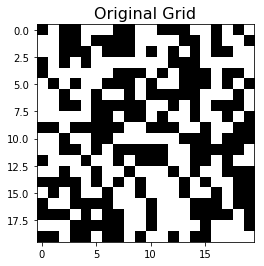

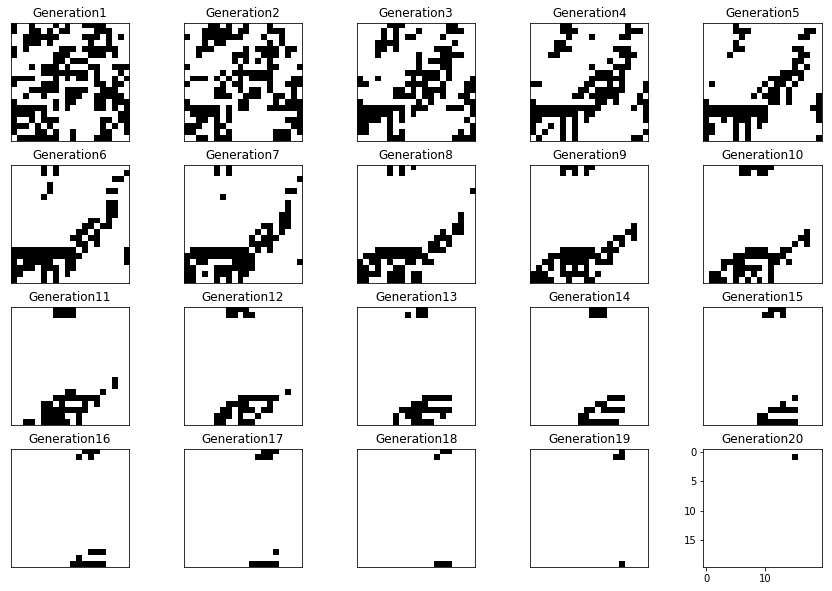

In [11]:
# generating board of size 20 x 20.
board=genboard((20,20))

# printing generations
life(board,20)
plt.show()

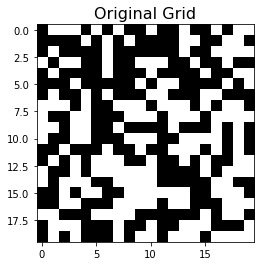

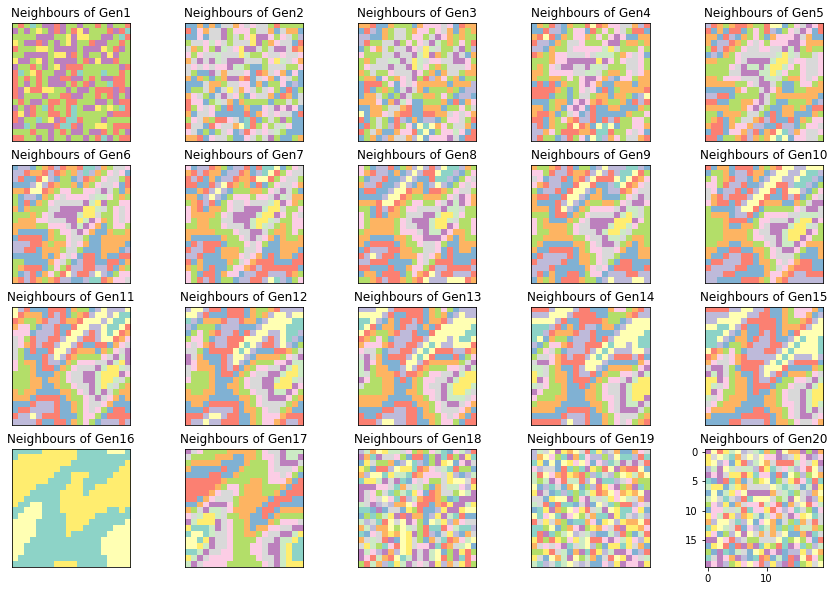

In [12]:
# generating board of size 20 x 20.
board=genboard((20,20))

# printing generations
neighbours(board,20)
plt.show()